Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
%matplotlib inline

In [60]:
amazon_cells=pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_cells.columns = ['message','spam']

In [61]:
amazon_cells.head()

,message,spam
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [62]:
amazon_cells.shape

(1000, 2)

In [63]:
key_words=['!','recommend','click', 'offer', 'winner', 'buy', 'free', 'cash']

for i in key_words:
    amazon_cells[str(i)]=amazon_cells.message.str.contains(str(i),
        case=False)

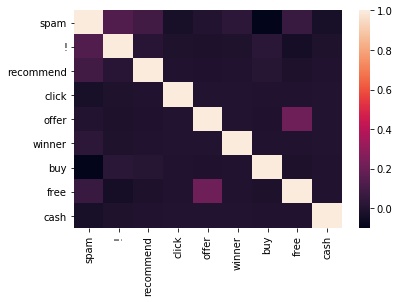

In [64]:
sns.heatmap(amazon_cells.corr())

In [65]:
from sklearn.naive_bayes import BernoulliNB

In [66]:
bnb = BernoulliNB()

In [67]:
target=amazon_cells['spam']

variables=amazon_cells[key_words]

bnb.fit(variables,target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [68]:
y_pred = bnb.predict(variables)

In [69]:
print("Number of mislabeled points out of a total {} points : {}".format(
    variables.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 435


### Trying same model with different dataset 

In [70]:
yelp=pd.read_csv('yelp_labelled.txt',delimiter= '\t', header=None)
yelp.columns=['message','spam']

In [71]:
yelp.head()

,message,spam
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [72]:
key_words=['!','recommend','click', 'winner', 'buy', 'free', 'cash']

for i in key_words:
    yelp[str(i)]=yelp.message.str.contains(str(i),
        case=False)

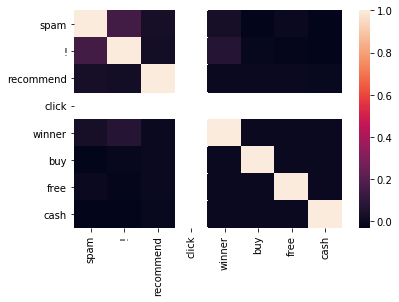

In [73]:
sns.heatmap(yelp.corr())

In [74]:
target=yelp['spam']

variables=yelp[key_words]

bnb.fit(variables,target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [75]:
y_pred = bnb.predict(variables)

In [76]:
print("Number of mislabeled points out of a total {} points : {}".format(
    variables.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 442
